<a href="https://colab.research.google.com/github/noelmt7/LAB-6/blob/main/Lab6_2348522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Preprocessing: Clean and preprocess the dataset, including handling missing values (if
any) and encoding categorical variables like &#39;sex&#39;, &#39;smoker&#39;, and &#39;region&#39;.

###Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

###Reading CSV file

In [ ]:
df=pd.read_csv('/content/insurance.csv')

In [ ]:
df.head() #we can see an overview of the dataset , top 5 rows were given

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Data Preprocessing

In [ ]:
df.isnull().sum() #looking for nulls #found no nulls

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #importing the label encoder

In [ ]:
df['sex']=le.fit_transform(df['sex']) #transforming sex column to encoded 1,0 values

In [ ]:
df['smoker']=le.fit_transform(df['smoker']) #smoker is also encoded as 1,0

In [ ]:
df = pd.get_dummies(df, columns=['region'], drop_first=True) #changed the region column into  3 columns and made it binary by one hot encoding

In [ ]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


2.Linear Regression Model: Build a linear regression model to predict medical insurance costs
(charges) based on the available features (age, sex, BMI, children, smoker, region).

3. Model Evaluation:
- Split the dataset into training and testing sets.

###Training and Testing

In [ ]:
#Train the linear regression model on the training set.
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Running Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) #Training the model on the train dataset

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((y_pred - y_test) ** 2)
print("Residual Sum of Squares (RSS):", rss)

# Calculate Explained Variance Score
explained_var = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var)

# Calculate Adjusted R-squared
n = len(X_test)  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)


Mean Absolute Error (MAE): 4181.1944737536505
Mean Squared Error (MSE): 33596915.85136146
Root Mean Squared Error (RMSE): 5796.2846592762735
R-squared (R2) score: 0.7835929767120723
Residual Sum of Squares (RSS): 9003973448.164871
Explained Variance Score: 0.7839025861417648
Adjusted R-squared: 0.776908589892368


In [ ]:
feature_imp=model.coef_
feature_imp

array([ 2.56975706e+02, -1.85916916e+01,  3.37092552e+02,  4.25278784e+02,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

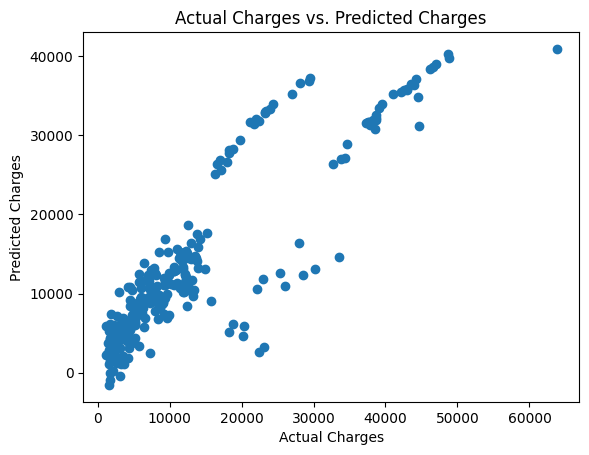

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs. Predicted Charges")
plt.show()


RECOMMENDATIONS

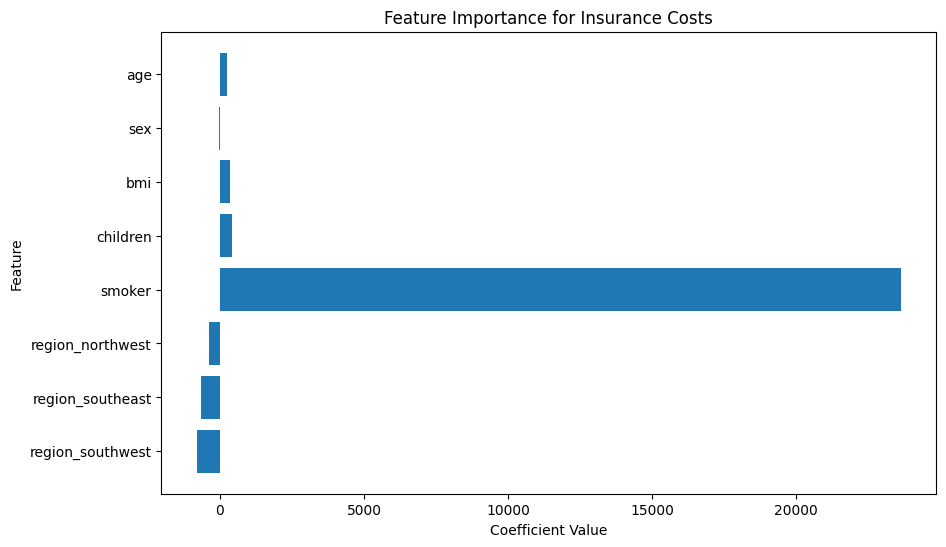

In [ ]:
import matplotlib.pyplot as plt

# Extract coefficients and feature names
coefficients = model.coef_
feature_names = X.columns

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Insurance Costs')
plt.gca().invert_yaxis()  # Invert the y-axis for readability
plt.show()   #from the below graph you can see that the main factor for high insurance charges is being a smoker or not

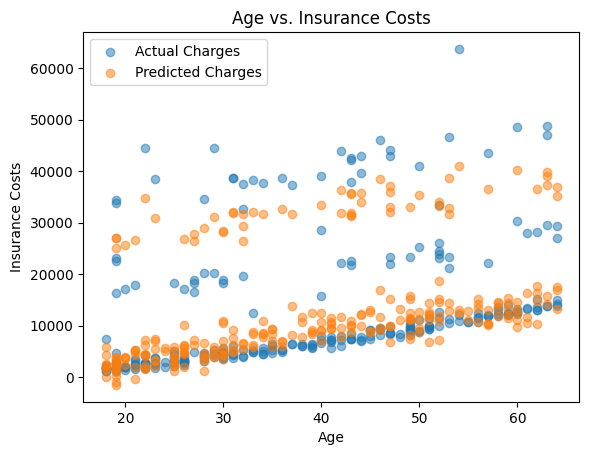

In [ ]:
plt.scatter(X_test['age'], y_test, label='Actual Charges', alpha=0.5)
plt.scatter(X_test['age'], y_pred, label='Predicted Charges', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Insurance Costs')
plt.legend()
plt.title('Age vs. Insurance Costs')
plt.show()
#noe we can see that the predicted vs actual charges , the model looks to have faired pretty well when predicting

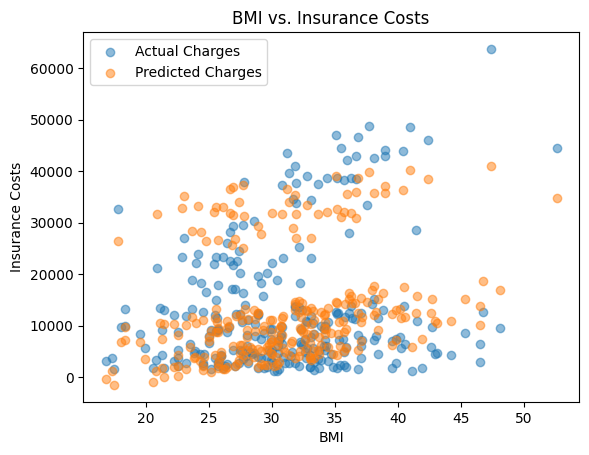

In [ ]:
plt.scatter(X_test['bmi'], y_test, label='Actual Charges', alpha=0.5)
plt.scatter(X_test['bmi'], y_pred, label='Predicted Charges', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Insurance Costs')
plt.legend()
plt.title('BMI vs. Insurance Costs')
plt.show()
#We are taking look at actual and predicted charges when compared with